# convert_false_positives

This script hosts utility for reading and checking dataset of false positive picks, gathered by [false_positives_picker.py](https://github.com/Syler1984/seismo-ml-phase-picker), as well as utility to convert this dataset to a standart [picker.py](https://github.com/Syler1984/seismo-ml-phase-picker/blob/master/picker.py) dataset. It's mainly done by dropping some data, like pseudo-probability, and by giving a string ID for each record.

In [13]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def plot_wave(d_set, i, x_name = 'X', y_name = 'Y', p_name = 'P'):
    
    waveform = d_set[x_name][i]
    n_channels = waveform.shape[1]
    
    # Normalize
    w_max = np.max(np.abs(waveform))
    waveform /= w_max
    
    # Plot
    fig = plt.figure(figsize = (8.8, 5.2), dpi = 160)
    axes = fig.subplots(n_channels, 1, sharex = True)
    
    if d_set['Y'][i] == 0:
        label = 'false P prediction'
    elif d_set['Y'][i] == 1:
        label = 'false S prediction'
    else:
        label = 'Something Else?'
        
    fig.suptitle(label)

    prob = f'p = {d_set[p_name][i]:.6f}'
    axes[0].set_title(prob)
    
    for j, ax in enumerate(axes.flatten()):
        ax.plot(waveform[:, j], color = '#000', linewidth = 1.)
        
    x_ticks = np.arange(0, 401, 50)
    x_labels = [x/100 for x in x_ticks]
    
    # x_labels[-1] = str(x_labels[-1]) + ' sec'
    
    for ax in axes:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_labels)
        
    axes[-1].set_xlabel('time, s')

## Read and test dataset

In [30]:
path = 'C:/data/false_positives/data.h5'

with h5.File(path, 'r') as d_set:
    print(d_set.keys())
    X = np.array(d_set['X'])
    Y = np.array(d_set['Y'])
    P = np.array(d_set['P'])

<KeysViewHDF5 ['P', 'X', 'Y']>


In [32]:
P[:20]

array([0.99117202, 0.99664694, 0.9981097 , 0.94859517, 0.98354948,
       0.9865855 , 0.99694049, 0.99055243, 0.99601513, 0.9902733 ,
       0.80373496, 0.99389935, 0.99870598, 0.99921238, 0.99312288,
       0.98971659, 0.99831855, 0.95415193, 0.97473663, 0.99331409])

In [35]:
X.shape, Y.shape, P.shape

((20041, 400, 3), (20041,), (20041,))

In [36]:
f'False P-waves: {(Y[:] == 0).sum()}; False S-waves: {(Y[:] == 1).sum()}; Noise: {(Y[:] == 2).sum()} - noise should be 0'

'False P-waves: 7563; False S-waves: 12478; Noise: 0 - noise should be 0'

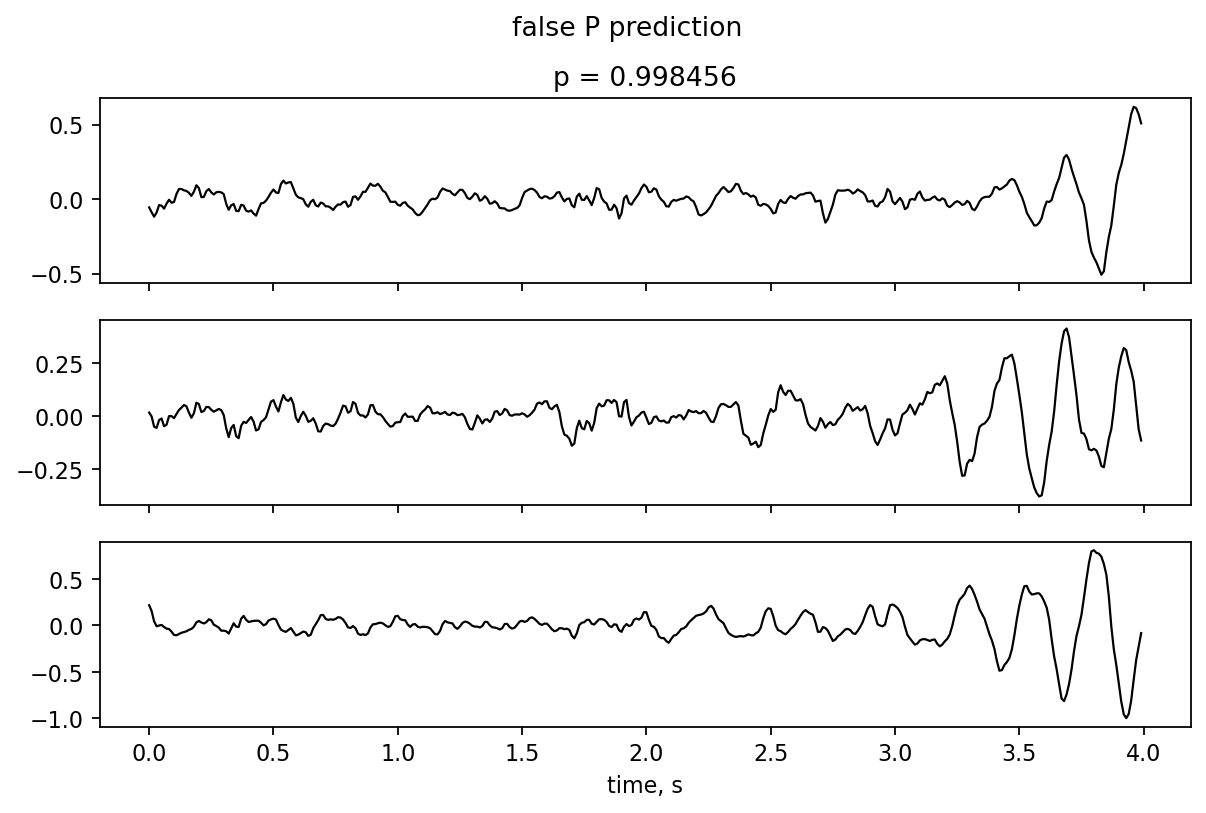

In [44]:
# Plot random pick
plot_wave({'X': X, 'Y': Y, 'P': P}, np.random.randint(0, X.shape[0]))

In [23]:
d_set.close()

## Test false picks on the model

In [25]:
# Modifying sys.path to be able to load seismo-transformer modules
import sys
sys.path.append('../../seismo-transformer/')
sys.path.append('../../seismo-transformer/utils')

import seismo_load

In [26]:
weights_path = 'C:/dev/seismo-transformer/WEIGHTS/w_model_performer_with_spec.hd5'
model = seismo_load.load_performer(weights_path)

In [41]:
scores = model.predict(X)

In [42]:
scores.round(3)

array([[0.992, 0.001, 0.007],
       [0.001, 0.997, 0.002],
       [0.001, 0.998, 0.001],
       ...,
       [0.001, 0.998, 0.001],
       [0.007, 0.988, 0.006],
       [0.02 , 0.921, 0.058]], dtype=float32)

In [47]:
scores.max(axis = 1)[:100]

array([0.99216956, 0.996845  , 0.99807334, 0.9533933 , 0.984812  ,
       0.98789144, 0.995415  , 0.99173003, 0.99684876, 0.9903673 ,
       0.8032029 , 0.9946668 , 0.9988366 , 0.9992518 , 0.99376243,
       0.9899564 , 0.99855596, 0.9584965 , 0.97830176, 0.99469477,
       0.93909436, 0.9745754 , 0.9928006 , 0.9758891 , 0.9416523 ,
       0.98770636, 0.99502605, 0.9978807 , 0.9972531 , 0.9849058 ,
       0.9809505 , 0.99671626, 0.9946812 , 0.99600285, 0.95701426,
       0.9919478 , 0.9870524 , 0.9715413 , 0.9007852 , 0.89581895,
       0.9972683 , 0.99394035, 0.98470116, 0.95484483, 0.97987366,
       0.9883847 , 0.9093679 , 0.9151831 , 0.9971136 , 0.97491324,
       0.985204  , 0.96340054, 0.9902845 , 0.99554825, 0.9882939 ,
       0.99271774, 0.9990434 , 0.9965964 , 0.99217075, 0.9904524 ,
       0.9644065 , 0.9157697 , 0.9006453 , 0.9916774 , 0.9659442 ,
       0.999042  , 0.9863207 , 0.9903486 , 0.9868558 , 0.98853195,
       0.92289144, 0.98323387, 0.9955617 , 0.98622197, 0.99304

In [48]:
P[:100]

array([0.99117202, 0.99664694, 0.9981097 , 0.94859517, 0.98354948,
       0.9865855 , 0.99694049, 0.99055243, 0.99601513, 0.9902733 ,
       0.80373496, 0.99389935, 0.99870598, 0.99921238, 0.99312288,
       0.98971659, 0.99831855, 0.95415193, 0.97473663, 0.99331409,
       0.92136902, 0.97158211, 0.99119616, 0.97059244, 0.9750036 ,
       0.98612148, 0.99503505, 0.99794918, 0.99706727, 0.98201478,
       0.97871107, 0.9964096 , 0.99383545, 0.99539632, 0.95003515,
       0.98925996, 0.9857356 , 0.96977019, 0.89243162, 0.9322654 ,
       0.9969663 , 0.99236965, 0.9830451 , 0.94231522, 0.97805572,
       0.98743689, 0.91953206, 0.89440489, 0.99675971, 0.97184157,
       0.98343199, 0.95422673, 0.99020725, 0.99524575, 0.98574948,
       0.99008358, 0.99901462, 0.99637717, 0.98999047, 0.98839068,
       0.95954078, 0.91133636, 0.88895738, 0.99117273, 0.94966507,
       0.99912292, 0.98595214, 0.98644441, 0.96965516, 0.96740347,
       0.96988934, 0.97507352, 0.98705846, 0.97320288, 0.98495

In [45]:
scores.argmax(axis = 1)[:100]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
Y[:100]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
class_scores = scores.argmax(axis = 1)

In [29]:
(class_scores[:] == 0).sum(), scores.shape[0]

(48065, 60117)

In [30]:
(class_scores[:] == 1).sum(), scores.shape[0]

(12052, 60117)

In [31]:
(class_scores[:] == 2).sum(), scores.shape[0]

(0, 60117)

In [32]:
np.array(Y)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
# .. correct out of ..
(scores.argmax(axis = 1) == np.array(d_set['Y'])).sum(), scores.shape[0]

(0, 140)

## Convert Labels

In [49]:
from utils.h5_tools import write_batch

In [50]:
false_positives_path = 'C:/data/false_positives/data.h5'
save_path = 'C:/data/false_positives/data_converted.h5'

In [51]:
d_set = h5.File(false_positives_path, 'r')

In [53]:
d_set['X'].shape

(20041, 400, 3)

In [54]:
X = np.array(d_set['X'])
Y = np.full(d_set['Y'].shape, 2, dtype = 'int',)
Z = np.full(d_set['Y'].shape, 'false_positive', dtype = 'object')

In [55]:
write_batch(save_path, 'X', X)
write_batch(save_path, 'Y', Y)
write_batch(save_path, 'Z', Z, string = True)

In [56]:
d_set.close()